<a href="https://colab.research.google.com/github/tapasML/EVAB2_Session_12/blob/main/Sessionj_12_yolo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Function calculates the normalized width, hight for the bounding boxes.

Note that the pythob modules boundingbox.py and findingK.py are also uploaded in github

In [ ]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.datasets.samples_generator import make_blobs
from sklearn.cluster import KMeans

def calculate_bbox_width_height():
    df = pd.read_json (r'YOLO.json')
    num_regions=0
    points= np.zeros((371,2))
    count = 0

    # transpose for convert each row, an image
    df=df.transpose()

    for j in range(120):    
        image_attr = df['file_attributes'].values[j]
        # image 
        WIDTH  = int(image_attr['image_width'])
        HEIGHT = int(image_attr['image_height'])
    
        # one image may have multiple regions / bounding boxes
        segment = df['regions'].values[j]
        num_regs_in_img = len(segment)
        num_regions += num_regs_in_img
    
        for k in range(num_regs_in_img): 
            _box_segment = segment[k]                      
    
            # bounding box origin
            bb_x =  _box_segment['shape_attributes']['x']
            bb_y =  _box_segment['shape_attributes']['y']
    
            # bounding box width/height
            W = _box_segment['shape_attributes']['width']
            H = _box_segment['shape_attributes']['height']
       
    
            # bounding box width/height normalized
            ww = round(W/WIDTH, 4)
            hh = round(H/HEIGHT, 4)
            
           
            points[count][0]=ww
            points[count][1]=hh
            count += 1            
        
            # centroid
            CX = bb_x + W/2 
            CY = bb_y + H/2
    
            # normalized centroid
            cxx = round(CX/WIDTH, 4)
            cyy = round(CY/HEIGHT, 4)     
    
            #print(f'width={ww}, height={hh}, cxx= {cxx}, cyy={cyy}')
    
    #print("#bounding boxes =", num_regions)  
    return points
    
calculate_bbox_width_height()


Calculate # of clusters

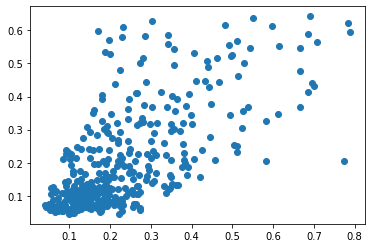

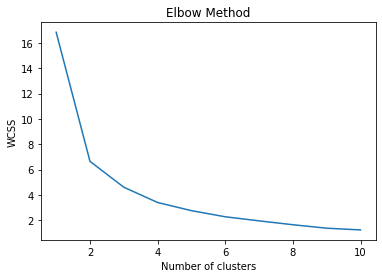

In [2]:

X = calculate_bbox_width_height()

plt.scatter(X[:,0], X[:,1])
plt.show()

wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
    
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()